# Student Class Success Case Study - Part 1 Tutorial 
Marlene Aviles 
DSC 550: Data Mining 
Week 6

In [2]:
conda install -c districtdatalabs yellowbrick

Solving environment: / 
  - anaconda/osx-64::ca-certificates-2019.11.27-0, anaconda/osx-64::certifi-2019.11.28-py37_0, anaconda/osx-64::conda-4.8.1-py37_0
  - anaconda/osx-64::ca-certificates-2019.11.27-0, anaconda/osx-64::certifi-2019.11.28-py37_0, defaults/osx-64::conda-4.8.1-py37_0
  - anaconda/osx-64::ca-certificates-2019.11.27-0, anaconda/osx-64::conda-4.8.1-py37_0, defaults/osx-64::certifi-2019.11.28-py37_0
  - anaconda/osx-64::ca-certificates-2019.11.27-0, defaults/osx-64::certifi-2019.11.28-py37_0, defaults/osx-64::conda-4.8.1-py37_0
  - anaconda/osx-64::conda-4.8.1-py37_0, defaults/osx-64::ca-certificates-2019.11.27-0, defaults/osx-64::certifi-2019.11.28-py37_0
  - defaults/osx-64::ca-certificates-2019.11.27-0, defaults/osx-64::certifi-2019.11.28-py37_0, defaults/osx-64::conda-4.8.1-py37_0
  - anaconda/osx-64::certifi-2019.11.28-py37_0, anaconda/osx-64::conda-4.8.1-py37_0, defaults/osx-64::ca-certificates-2019.11.27-0
  - anaconda/osx-64::certifi-2019.11.28-py37_0, defaults/os

In [13]:
pip install seaborn

  Using cached https://files.pythonhosted.org/packages/a8/76/220ba4420459d9c4c9c9587c6ce607bf56c25b3d3d2de62056efe482dadc/seaborn-0.9.0-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


## Case Study Narrative:

The following analysis will focus on the Student Performance Data Set to assist in predicting student performance in secondary education. The term secondary education in this dataset in the country of Portugal is the equivalent of what high school is in the United States. The dataset was gathered through the 2005 - 2006 school cycle years from two public schools in Portugal to gather information on the enrolled student's demographics. The dataset from the schools recognized as Gabriel Pereira (GP) and Mousinho da Silveira (MS) looked at numerous factors such as the student's social, economic, gender, and study information (Cortez & Silva, 2008). Their data yielded two final datasets looking at their Mathematical and Portuguese Language performance via school reports and questionnaires. The focus of this analysis is to measure the student's overall success in the mathematical course, by looking at their age, the time they spent studying, the number of class failures before this course, and the cumulative grade achieved in this course (G3). This dataset contains a total of 33 variables and 395 responses. 

Being able to identify the students' success in a classroom during their secondary education can be a crucial component to assist in the success of achieving higher education. According to the Organisation for Economic Co-operation and Development (OECD), the country of Portugal has not seen a decline in the registration for tertiary education, yet only 30% of those students graduated during the expected three-year mark (OECD, 2019). 

If students in the country of Portugal complete their secondary education and success factors can be identified during this significant time, then their chances of attaining a higher education are more plausible. 

In [57]:
# school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
# sex - student's sex (binary: 'F' - female or 'M' - male)
# age - student's age (numeric: from 15 to 22)
# address - student's home address type (binary: 'U' - urban or 'R' - rural)
# famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
# Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
# Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
# Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
# Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
# Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
# reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
# guardian - student's guardian (nominal: 'mother', 'father' or 'other')
# traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
# studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
# failures - number of past class failures (numeric: n if 1<=n<3, else 4)
# schoolsup - extra educational support (binary: yes or no)
# famsup - family educational support (binary: yes or no)
# paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
# activities - extra-curricular activities (binary: yes or no)
# nursery - attended nursery school (binary: yes or no)
# higher - wants to take higher education (binary: yes or no)
# internet - Internet access at home (binary: yes or no)
# romantic - with a romantic relationship (binary: yes or no)
# famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
# freetime - free time after school (numeric: from 1 - very low to 5 - very high)
# goout - going out with friends (numeric: from 1 - very low to 5 - very high)
# Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
# Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
# health - current health status (numeric: from 1 - very bad to 5 - very good)
# absences - number of school absences (numeric: from 0 to 93)
# These grades are related with the course subject, Math or Portuguese:

# G1 - first period grade (numeric: from 0 to 20)
# G2 - second period grade (numeric: from 0 to 20)
# G3 - final grade (numeric: from 0 to 20, output target)

In [1]:
import pandas as pd 
import yellowbrick
import seaborn as sns
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

/Users/marleneaviles/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
addr1 = "student-mat.csv"
data = pd.read_csv(addr1)

In [3]:
# Step 2:  check the dimension of the table
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (395, 33)


In [4]:
#Step 3:  Look at the data
print(data.head(5))

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [5]:
#Step 5:  what type of variables are in the table 
print("Describe Data")
print(data.describe())
print("Summarized Data")
print(data.describe(include=['O']))

Describe Data
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.89

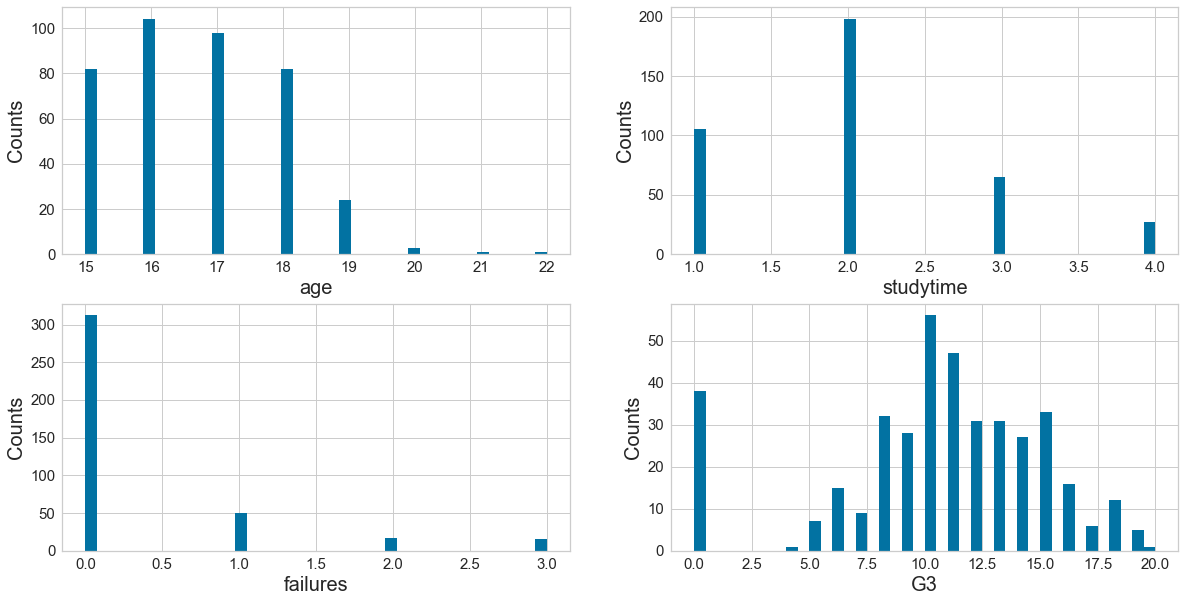

In [6]:
#Step 6: import visulization packages

import matplotlib.pyplot as plt

# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['age', 'studytime', 'failures','G3']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()


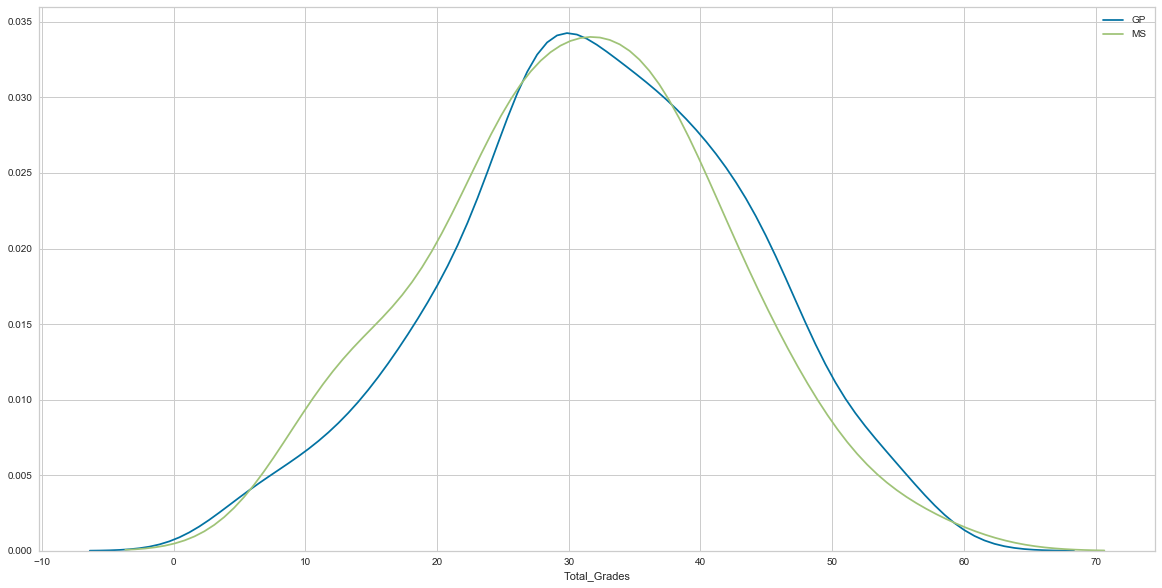

In [7]:
# comparing the total_grades data for both schools 
# 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira

data['Total_Grades'] = data['G1'] + data['G2'] + data['G3']

GP = data[data.school == 'GP']
MS = data[data.school == 'MS']

sns.distplot(GP.Total_Grades, hist=False, label="GP")
sns.distplot(MS.Total_Grades, hist=False, label="MS")
plt.show()

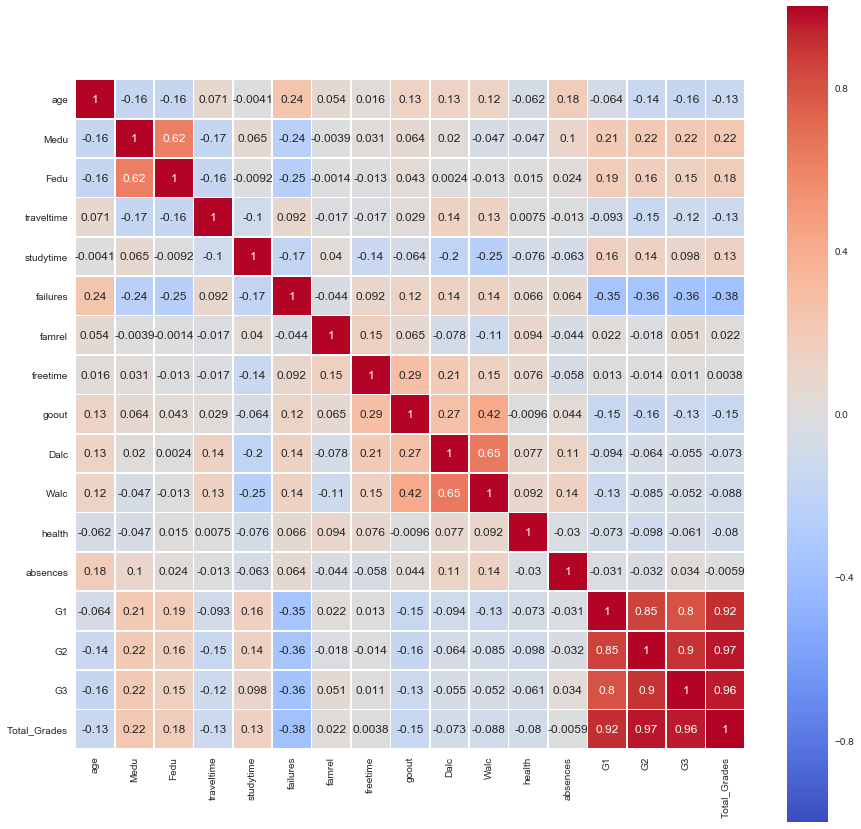

In [8]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize=(15,15))
hmap = sns.heatmap(data.corr(), square=True, annot=True,linewidths=0.7, vmin=-1,cmap='coolwarm')

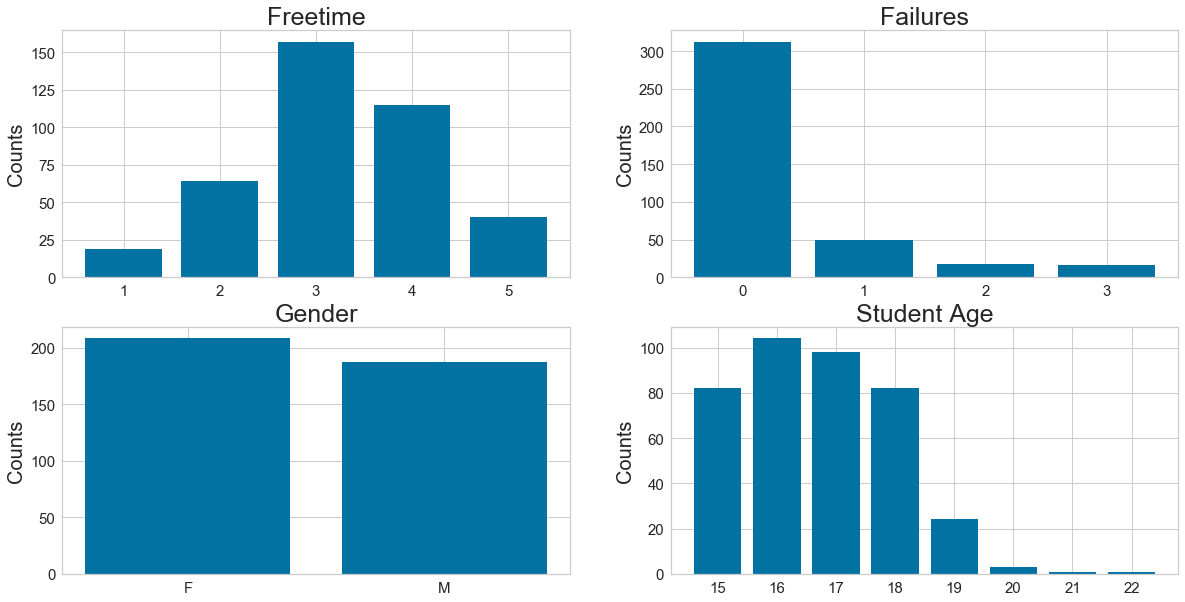

In [9]:
#7:  Barcharts: set up the figure size

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
X_Freetime = data.replace({'freetime': {1: '1', 2: '2',3:'3',4:'4', 5:'5'}}).groupby('freetime').size().reset_index(name='Counts')['freetime']
Y_Freetime = data.replace({'freetime': {1: '1', 2: '2',3:'3',4:'4', 5:'5'}}).groupby('freetime').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_Freetime, Y_Freetime)
axes[0, 0].set_title('Freetime', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Fclass = data.replace({'failures': {0: '0', 1: '1', 2: '2', 3:'3'}}).groupby('failures').size().reset_index(name='Counts')['failures']
Y_Fclass = data.replace({'failures': {0: '0', 1: '1', 2: '2', 3:'3'}}).groupby('failures').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_Fclass,Y_Fclass)
axes[0, 1].set_title('Failures', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Sex = data.groupby('sex').size().reset_index(name='Counts')['sex']
Y_Sex = data.groupby('sex').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Gender', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Age = data.groupby('age').size().reset_index(name='Counts')['age']
Y_Age = data.groupby('age').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_Age, Y_Age)
axes[1, 1].set_title('Student Age', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
plt.show()



In [10]:
# Observations:
# Mininal amount of class failures and they seem to have a fair amount of free time. 
# Slightly more females than males present in the dataset
# Age concentration 15-18, avg: 16.69 years 

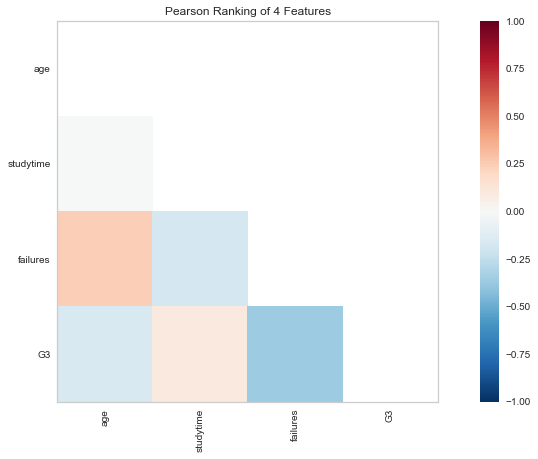

In [11]:
#Step 8: Pearson Ranking
#set up the figure size

%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = data[num_features].as_matrix()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="Desktop") # Draw/show/poof the data
plt.show()

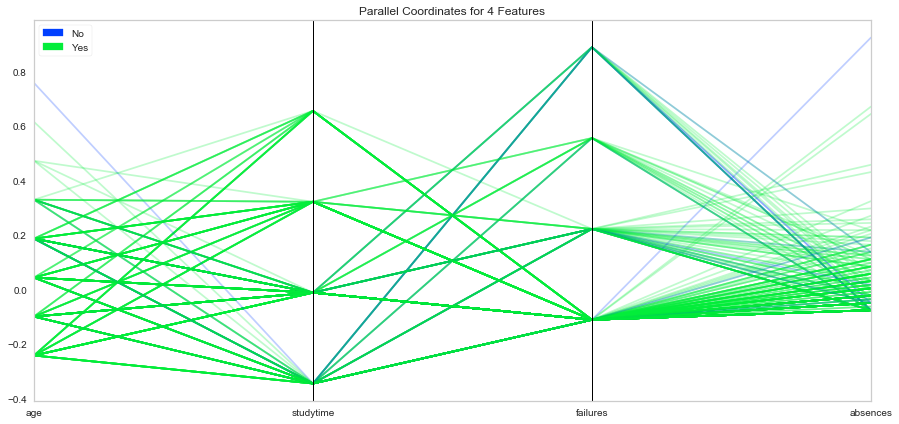

In [12]:
# Step 9:  Compare variables against wanting to pursue higher education.  
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['No','Yes' ]
num_features = ['age', 'studytime', 'failures', 'absences']

# copy data to a new dataframe
data_norm = data.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].as_matrix()
y = data.higher.as_matrix() ## fix this portion with the correct variable, varible must match # key legends/classes

# Instantiate the visualizer
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)


visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof(outpath="~Desktop") # Draw/show/poof the data
plt.show();


### Part 2: Dimensionality and Feature Reduction

In [13]:
# Step 10: Dimensionality Reduction: values lowest correlation to G3
data = pd.read_csv(addr1)
data = data.drop(["traveltime","failures","age","goout","health","Walc","Dalc"], axis=1)
data.head(20)

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,nursery,higher,internet,romantic,famrel,freetime,absences,G1,G2,G3
0,GP,F,U,GT3,A,4,4,at_home,teacher,course,...,yes,yes,no,no,4,3,6,5,6,6
1,GP,F,U,GT3,T,1,1,at_home,other,course,...,no,yes,yes,no,5,3,4,5,5,6
2,GP,F,U,LE3,T,1,1,at_home,other,other,...,yes,yes,yes,no,4,3,10,7,8,10
3,GP,F,U,GT3,T,4,2,health,services,home,...,yes,yes,yes,yes,3,2,2,15,14,15
4,GP,F,U,GT3,T,3,3,other,other,home,...,yes,yes,no,no,4,3,4,6,10,10
5,GP,M,U,LE3,T,4,3,services,other,reputation,...,yes,yes,yes,no,5,4,10,15,15,15
6,GP,M,U,LE3,T,2,2,other,other,home,...,yes,yes,yes,no,4,4,0,12,12,11
7,GP,F,U,GT3,A,4,4,other,teacher,home,...,yes,yes,no,no,4,1,6,6,5,6
8,GP,M,U,LE3,A,3,2,services,other,home,...,yes,yes,yes,no,4,2,0,16,18,19
9,GP,M,U,GT3,T,3,4,other,other,home,...,yes,yes,yes,no,5,5,0,14,15,15


In [14]:
# check the dimension of the table to verify feautres were dropped
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (395, 26)


In [15]:
# Step 11: One-hot enconding and conversion of feautures into binary features
data.school[data.school == 'GP'] = 1
data.school[data.school == 'MS'] = 0
data.sex[data.sex == 'M'] = 1
data.sex[data.sex == 'F'] = 0
data.address[data.address == 'U'] = 1
data.address[data.address == 'R'] = 0
data.famsize[data.famsize == 'GT3'] = 1
data.famsize[data.famsize == 'LE3'] = 0
data.Pstatus[data.Pstatus == 'T'] = 1
data.Pstatus[data.Pstatus == 'A'] = 0
cols_to_transform = [ 'Mjob','Fjob','reason','guardian' ] # transformation required 
data=pd.get_dummies(data,columns=cols_to_transform) 

In [16]:
data.schoolsup[data.schoolsup == 'yes'] = 1
data.schoolsup[data.schoolsup == 'no'] = 0
data.famsup[data.famsup == 'yes'] = 1
data.famsup[data.famsup == 'no'] = 0
data.paid[data.paid == 'yes'] = 1
data.paid[data.paid == 'no'] = 0
data.activities[data.activities == 'yes'] = 1
data.activities[data.activities == 'no'] = 0
data.nursery[data.nursery == 'yes'] = 1
data.nursery[data.nursery == 'no'] = 0
data.higher[data.higher == 'yes'] = 1
data.higher[data.higher == 'no'] = 0
data.internet[data.internet == 'yes'] = 1
data.internet[data.internet == 'no'] = 0
data.romantic[data.romantic == 'yes'] = 1
data.romantic[data.romantic == 'no'] = 0


data.head(10)

,school,sex,address,famsize,Pstatus,Medu,Fedu,studytime,schoolsup,famsup,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,0,1,1,0,4,4,2,1,0,...,0,0,1,1,0,0,0,0,1,0
1,1,0,1,1,1,1,1,2,0,1,...,1,0,0,1,0,0,0,1,0,0
2,1,0,1,0,1,1,1,2,1,0,...,1,0,0,0,0,1,0,0,1,0
3,1,0,1,1,1,4,2,3,0,1,...,0,1,0,0,1,0,0,0,1,0
4,1,0,1,1,1,3,3,2,0,1,...,1,0,0,0,1,0,0,1,0,0
5,1,1,1,0,1,4,3,2,0,1,...,1,0,0,0,0,0,1,0,1,0
6,1,1,1,0,1,2,2,2,0,0,...,1,0,0,0,1,0,0,0,1,0
7,1,0,1,1,0,4,4,2,1,1,...,0,0,1,0,1,0,0,0,1,0
8,1,1,1,0,0,3,2,2,0,1,...,1,0,0,0,1,0,0,0,1,0
9,1,1,1,1,1,3,4,2,0,1,...,1,0,0,0,1,0,0,0,1,0


### Part 3: Model Selection and Evaluation

In [17]:
#Step 12: Final grade, G3 target variable is dropped 
y =  data[[ 'G3']].mean(axis=1)
data = data.drop(["G3"], axis=1)
data.head()

,school,sex,address,famsize,Pstatus,Medu,Fedu,studytime,schoolsup,famsup,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,0,1,1,0,4,4,2,1,0,...,0,0,1,1,0,0,0,0,1,0
1,1,0,1,1,1,1,1,2,0,1,...,1,0,0,1,0,0,0,1,0,0
2,1,0,1,0,1,1,1,2,1,0,...,1,0,0,0,0,1,0,0,1,0
3,1,0,1,1,1,4,2,3,0,1,...,0,1,0,0,1,0,0,0,1,0
4,1,0,1,1,1,3,3,2,0,1,...,1,0,0,0,1,0,0,1,0,0


Mean squared error: 3.53
Mean difference: 1.24
r2 score: 0.82


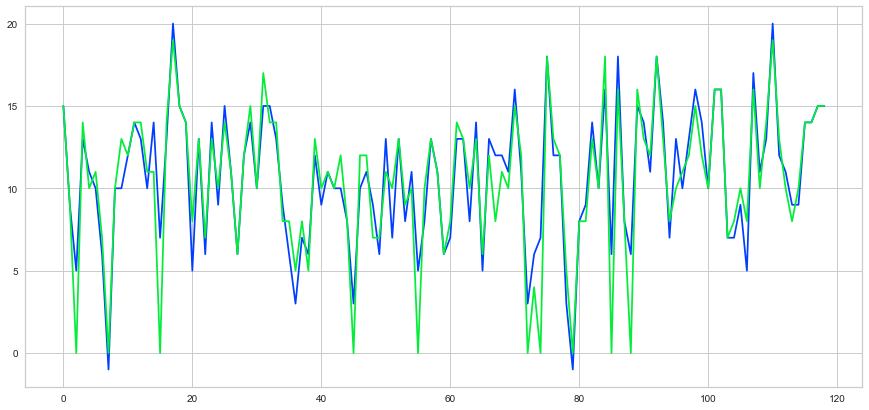

In [24]:
# Step 13: Linear regressor 
# split data into training and test sets 30 test / 70 training 

# Results:

# Mean squared error: 3.53 larger number larger error 
# Mean difference: 1.24
# r2 score: 0.82

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data,y, test_size=0.3)

# training the model 30 test/ 70 training 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = np.round(regr.predict(X_test))
meansqr=[]
Avgdiff=[]
r2=[]
meansqr.append(mean_squared_error(y_test, y_pred))
Avgdiff.append(abs(y_test-y_pred).mean())
r2.append(r2_score(y_test, y_pred))

print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print("Mean difference: %.2f"% abs(y_test-y_pred).mean())
print("r2 score: %.2f"% r2_score(y_test, y_pred))

#plotting y_pred and y_test
t = np.arange(0,len(y_pred) , 1)
plt.plot(t,y_pred,t,y_test)

Mean squared error: 4.14
Mean difference: 1.43
r2 score: 0.80


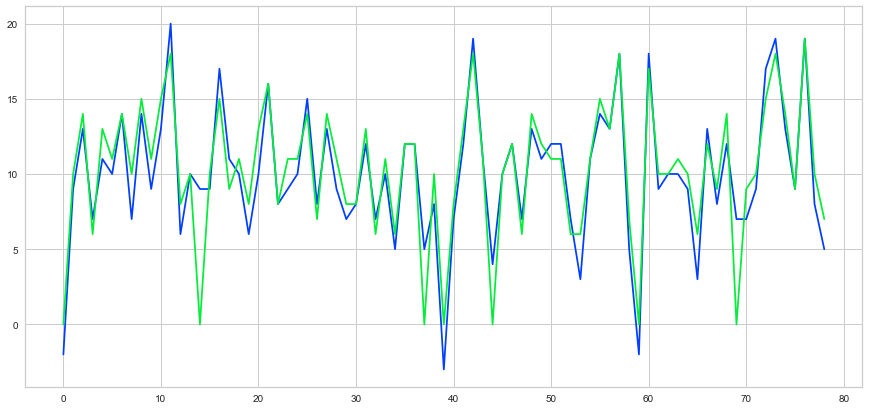

In [22]:
# training model with 20 test /80 training split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data,y, test_size=0.20)

# training the model
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = np.round(regr.predict(X_test))
meansqr=[]
Avgdiff=[]
r2=[]
meansqr.append(mean_squared_error(y_test, y_pred))
Avgdiff.append(abs(y_test-y_pred).mean())
r2.append(r2_score(y_test, y_pred))

print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print("Mean difference: %.2f"% abs(y_test-y_pred).mean())
print("r2 score: %.2f"% r2_score(y_test, y_pred))

#plotting y_pred and y_test
t = np.arange(0,len(y_pred) , 1)
plt.plot(t,y_pred,t,y_test)

Mean squared error: 5.33
Mean difference: 1.34
r2 score: 0.75


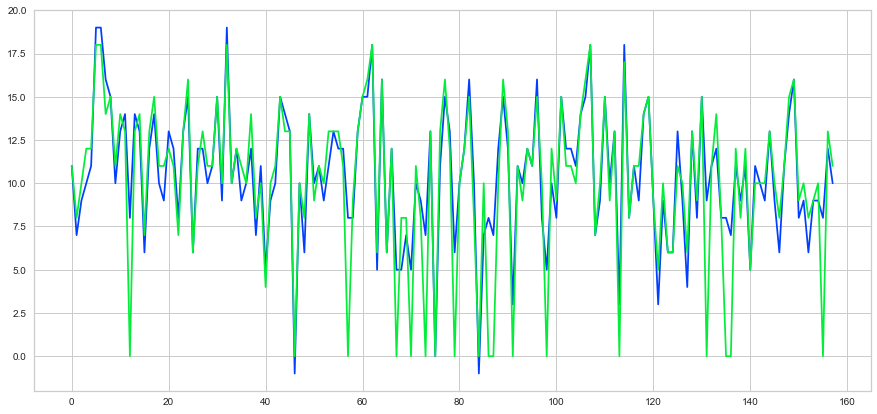

In [23]:
# training the model 40 test / 60 training 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data,y, test_size=0.40)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = np.round(regr.predict(X_test))
meansqr=[]
Avgdiff=[]
r2=[]
meansqr.append(mean_squared_error(y_test, y_pred))
Avgdiff.append(abs(y_test-y_pred).mean())
r2.append(r2_score(y_test, y_pred))

print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print("Mean difference: %.2f"% abs(y_test-y_pred).mean())
print("r2 score: %.2f"% r2_score(y_test, y_pred))

#plotting y_pred and y_test
t = np.arange(0,len(y_pred) , 1)
plt.plot(t,y_pred,t,y_test)

Mean squared error: 2.17
Mean difference: 0.94
r2 score: 0.89


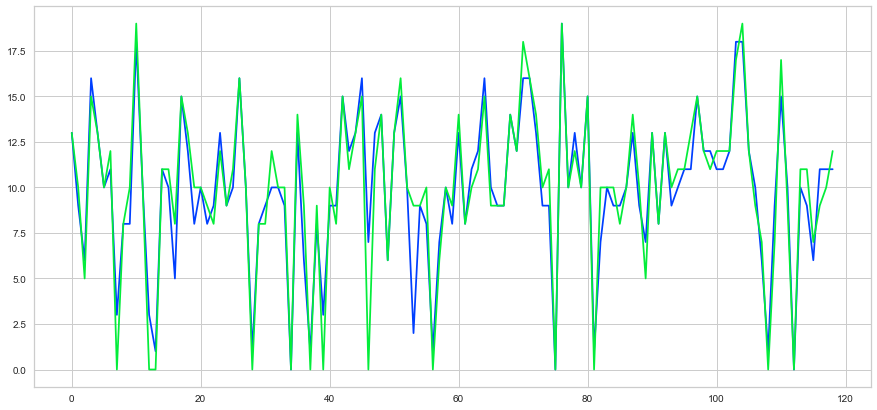

In [20]:
# Step 14: Random Forest Regressor 

# Results:

# Mean squared error: 2.17 larger the number larger error 
# Mean difference: 0.94
# r2 score: 0.89

from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 10)

# Train the model on training data
rf.fit(X_train, y_train);
y_pred =np.round(rf.predict(X_test))
meansqr.append(mean_squared_error(y_test, y_pred))
Avgdiff.append(abs(y_test-y_pred).mean())
r2.append(r2_score(y_test, y_pred))

print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print("Mean difference: %.2f"% abs(y_test-y_pred).mean())
print("r2 score: %.2f"% r2_score(y_test, y_pred))

#plotting y_pred and y_test
t = np.arange(0,len(y_pred) , 1)
plt.plot(t,y_pred,t,y_test)

### Observations 

In [21]:
# Step 15: Observations

# Best Model: Random forest regressor 

# Random forest regressor had the lowest MSE (mean square error): avg of square or errors 
# error here is difference between observed and predicted values 

# mean difference = mean between the observed and predicted values 

# r2 = 1 means perfect correlations, models with low r2 can also be good 
# random forrest regressor(r2=0.89) is better than other mnodels vs linear regressor (r2=0.82) 

The observations gathered by this analysis indicate that the student's success should be measured by studying more data and more suitable factors. The median age of the students in this survey was about 17 years old, and they average a cumulative grade of 10.42 out from a 0 to 20 range. The factors analyzed did not have any strong correlation in regard to the target variable (G3) of the student. The best model to predict the target variable was the random forest regressor, as it has a lower mean square error (MSE) and a higher r2 of 0.89 when compared to the linear regressor model. 

Sources Cited:

Cortez, P. & Silva, A. (2008).  Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th Future Business Technology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, EUROSIS. 
[Web Link]
https://archive.ics.uci.edu/ml/datasets/student+performance

OECD. (2019, September).Education at a glance 2019. OECD.
Retrieved from https://www.oecd.org/education/education-at-a-glance/EAG2019_CN_PRT.pdf

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.
